In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data, wb

import datetime
import random

%matplotlib inline


In [2]:
name = ['aapl','fb','pfe']  #list of stock we're interested in
start = '2015-01-01'  #starting date
end = datetime.datetime.today()

stock_prices = data.DataReader(name = name, data_source= 'yahoo', start = start, end = end)

In [3]:
#explore data and see what we wanted
stock_prices.head()
stock_prices.tail()

Attributes   Adj Close                              Close              \
Symbols           aapl          fb        pfe        aapl          fb   
Date                                                                    
2021-01-15  127.139999  251.360001  36.700001  127.139999  251.360001   
2021-01-19  127.830002  261.100006  36.730000  127.830002  261.100006   
2021-01-20  132.029999  267.480011  36.500000  132.029999  267.480011   
2021-01-21  136.869995  272.869995  36.480000  136.869995  272.869995   
2021-01-22  139.070007  274.500000  36.549999  139.070007  274.500000   

Attributes                   High                                Low  \
Symbols           pfe        aapl          fb        pfe        aapl   
Date                                                                   
2021-01-15  36.700001  130.220001  253.860001  36.779999  127.000000   
2021-01-19  36.730000  128.710007  262.200012  37.000000  126.940002   
2021-01-20  36.500000  132.490005  270.320007  36.810001  128.550003   
2021-01-21  36.480000  139.669998  273.600006  36.590000  133.589996   
2021-01-22  36.549999  139.850006  278.470001  36.830002  135.020004   

Attributes                               Open                         \
Symbols             fb        pfe        aapl          fb        pfe   
Date                                                                   
2021-01-15  247.160004  36.400002  128.779999  247.899994  36.680000   
2021-01-19  252.720001  36.619999  127.779999  256.899994  36.759998   
2021-01-20  263.600006  36.459999  128.660004  268.929993  36.790001   
2021-01-21  267.489990  36.150002  133.800003  269.260010  36.389999   
2021-01-22  272.000000  36.250000  136.279999  272.010010  36.320000   

Attributes       Volume                          
Symbols            aapl          fb         pfe  
Date                                             
2021-01-15  111235300.0  24786100.0  33948500.0  
2021-01-19   90757300.0  28028500.0  33451300.0  
2021-01-20  104319500.0  25199900.0  35400100.0  
2021-01-21  120529500.0  20838700.0  33864100.0  
2021-01-22  113907200.0  21910000.0  26243600.0

In [4]:
#extract the adjusted close
adj_close = stock_prices['Adj Close']
adj_close.head()
adj_close.tail()

Symbols,aapl,fb,pfe
Date,,,
2021-01-15,127.139999,251.360001,36.700001
2021-01-19,127.830002,261.100006,36.730000
2021-01-20,132.029999,267.480011,36.500000
2021-01-21,136.869995,272.869995,36.480000
2021-01-22,139.070007,274.500000,36.549999


In [5]:
returns = adj_close.pct_change().dropna()
returns.head()
returns.tail()

Symbols,aapl,fb,pfe
Date,,,
2021-01-15,-0.013731,0.023286,-0.001361
2021-01-19,0.005427,0.038749,0.000817
2021-01-20,0.032856,0.024435,-0.006262
2021-01-21,0.036658,0.020151,-0.000548
2021-01-22,0.016074,0.005974,0.001919


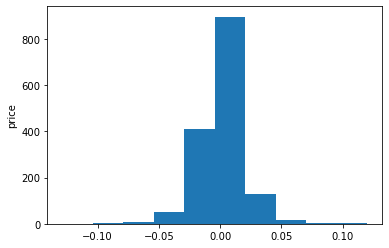

<function matplotlib.pyplot.show(close=None, block=None)>

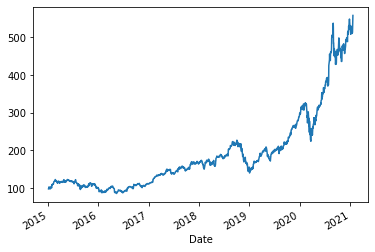

In [6]:
aapl_returns = returns['aapl']
plt.hist(aapl_returns)
plt.ylabel('price')
plt.show()

aapl_cummulative_returns = 100 * (aapl_returns +1).cumprod()
aapl_cummulative_returns.plot()
plt.show

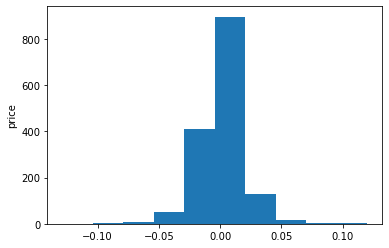

<function matplotlib.pyplot.show(close=None, block=None)>

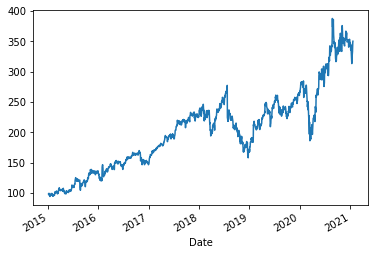

In [7]:
fb_returns = returns['fb']
plt.hist(aapl_returns)
plt.ylabel('price')
plt.show()

fb_cummulative_returns = 100 * (fb_returns +1).cumprod()
fb_cummulative_returns.plot()
plt.show

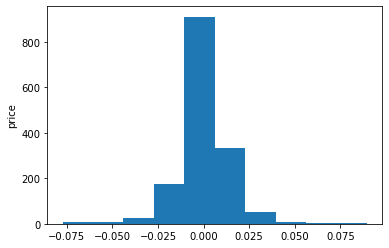

<function matplotlib.pyplot.show(close=None, block=None)>

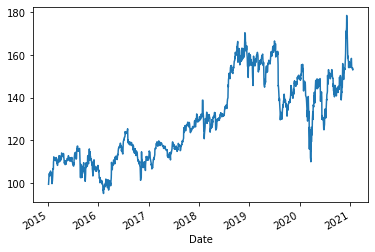

In [8]:
pfe_returns = returns['pfe']
plt.hist(pfe_returns)
plt.ylabel('price')
plt.show()

pfe_cummulative_returns = 100 * (pfe_returns +1).cumprod()
pfe_cummulative_returns.plot()
plt.show

In [9]:
annualized_returns = (1+ returns)**(365/252)-1
annualized_returns.head()
annualized_returns.tail()


Symbols,aapl,fb,pfe
Date,,,
2021-01-15,-0.019826,0.033903,-0.001970
2021-01-19,0.007870,0.056609,0.001184
2021-01-20,0.047938,0.035585,-0.009057
2021-01-21,0.053530,0.029318,-0.000794
2021-01-22,0.023365,0.008664,0.002780


In [10]:
annualized_returns.describe()

Symbols,aapl,fb,pfe
count,1524.000000,1524.000000,1524.000000
mean,0.002003,0.001616,0.000606
std,0.027095,0.029071,0.020017
min,-0.180825,-0.262517,-0.110058
25%,-0.009393,-0.010844,-0.008481
50%,0.001365,0.001581,0.000000
75%,0.014733,0.015942,0.009420
max,0.178095,0.232427,0.132354


In [11]:
aapl_annualized_returns = annualized_returns['aapl']
fb_annualized_returns = annualized_returns['fb']
pfe_annualized_returns = annualized_returns['pfe']


In [12]:
mu = annualized_returns.mean()
appl_mu = aapl_annualized_returns.mean()
fb_mu = fb_annualized_returns.mean()
pfe_mu = pfe_annualized_returns.mean()
print('appl expected return', appl_mu)
print('fb expected return', fb_mu)
print('pfe expected return', pfe_mu)

appl expected return 0.002003315743869438
fb expected return 0.001616464937824455
pfe expected return 0.0006058215935315604


In [13]:
annualized_volatility = annualized_returns.std()*np.sqrt(250)
print("mu","\n",mu,"\n\n" ,"sigma","\n",  annualized_volatility)

mu 
 Symbols
aapl    0.002003
fb      0.001616
pfe     0.000606
dtype: float64 

 sigma 
 Symbols
aapl    0.428408
fb      0.459660
pfe     0.316490
dtype: float64


In [14]:
for z in range (0,10,2):
    print(z, end="  ")

0  2  4  6  8  

In [15]:
#Set a seed
random.seed(123)

#Create an empty dataframe
df = pd.DataFrame()

#Number of iterations
n = 10000

#Risk free rate
#rfr = 0.0009/252
rfr = 0


#stocks_sigma

for i in range(n):
    
    weight_a = random.random()   #generate a random weight between 0-1
    
    df.loc[i, "weight_aapl"] = weight_a   #Assign that random weight to the first row (iteration)
    
    df.loc[i, "weight_fb"] = 1-weight_a  #weight of asset b is just 1-Wa
    
    df.loc[i, "portfolio_ret"] = (returns["aapl"]*weight_a + returns['fb']*(1-weight_a)).mean()
    
    df.loc[i, "portfolio_vol"] = (returns["aapl"]*weight_a + returns['fb']*(1-weight_a)).std()
    
    df.loc[i, "sharpe_ratio"] = (df.loc[i, "portfolio_ret"] - rfr)/ df.loc[i, 'portfolio_vol']


In [18]:
df.head()


,weight_aapl,weight_fb,portfolio_ret,portfolio_vol,sharpe_ratio
0,0.052364,0.947636,0.001040,0.019623,0.052991
1,0.087187,0.912813,0.001050,0.019329,0.054300
2,0.407242,0.592758,0.001139,0.017452,0.065259
3,0.107700,0.892300,0.001055,0.019163,0.055070
4,0.901199,0.098801,0.001277,0.018074,0.070644


In [21]:
df["sharpe_ratio"].max()

0.07097879134960874

In [24]:
df["sharpe_ratio"].idxmax()

479

In [25]:
max_sharpe_ratio = df.iloc[df[["sharpe_ratio"]].idxmax(),]
max_sharpe_ratio

,weight_aapl,weight_fb,portfolio_ret,portfolio_vol,sharpe_ratio
479,0.800635,0.199365,0.001249,0.017593,0.070979


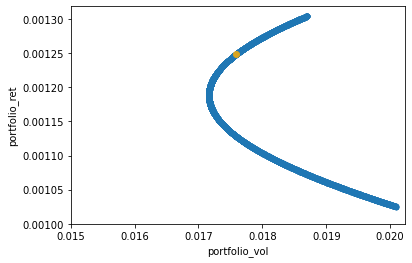

In [28]:
ax = df.plot.scatter(x="portfolio_vol", y="portfolio_ret")  #Axis

ax.set_xlim(left=0.015) 

ax.set_ylim(bottom=0.001)

#Add a point to the initial axis
ax.plot([max_sharpe_ratio["portfolio_vol"]], [max_sharpe_ratio['portfolio_ret']], color='goldenrod', marker="o")

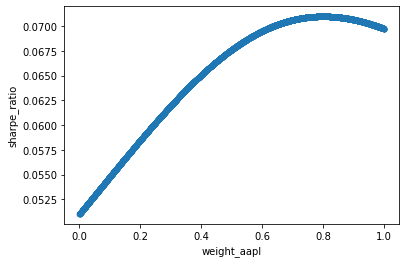

In [29]:
#Sharpe Ratio vs Weight of apple
df.plot.scatter(x="weight_aapl", y="sharpe_ratio")
plt.show()

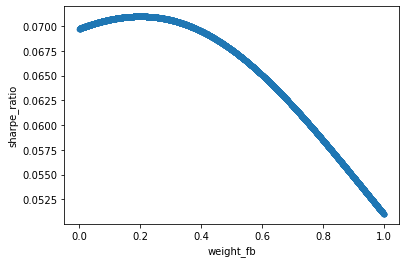

In [30]:
#Sharpe Ratio vs Weight of FB
df.plot.scatter(x="weight_fb", y="sharpe_ratio")
plt.show()